In [10]:
!pip install roboflow ultralytics

In [11]:
!nvidia-smi

Thu Aug  3 12:05:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [13]:
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import display, Image
import glob

In [ ]:
rf = Roboflow(api_key="VVo8cDjg7VUWPlRCShEQ")
project = rf.workspace("a-lc4zs").project("augmentasi-b8kdj")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.147, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to augmentasi-1 in yolov8:: 100%|██████████| 2648/2648 [00:01<00:00, 2335.36it/s]


In [14]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data={dataset.location}/data.yaml \
epochs=100 \
imgsz=640

Ultralytics YOLOv8.0.147 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/augmentasi-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynam

In [16]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2.jpg
confusion_matrix.png				    train_batch5220.jpg
events.out.tfevents.1691064375.3e8033e5898e.3229.0  train_batch5221.jpg
F1_curve.png					    train_batch5222.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


/content


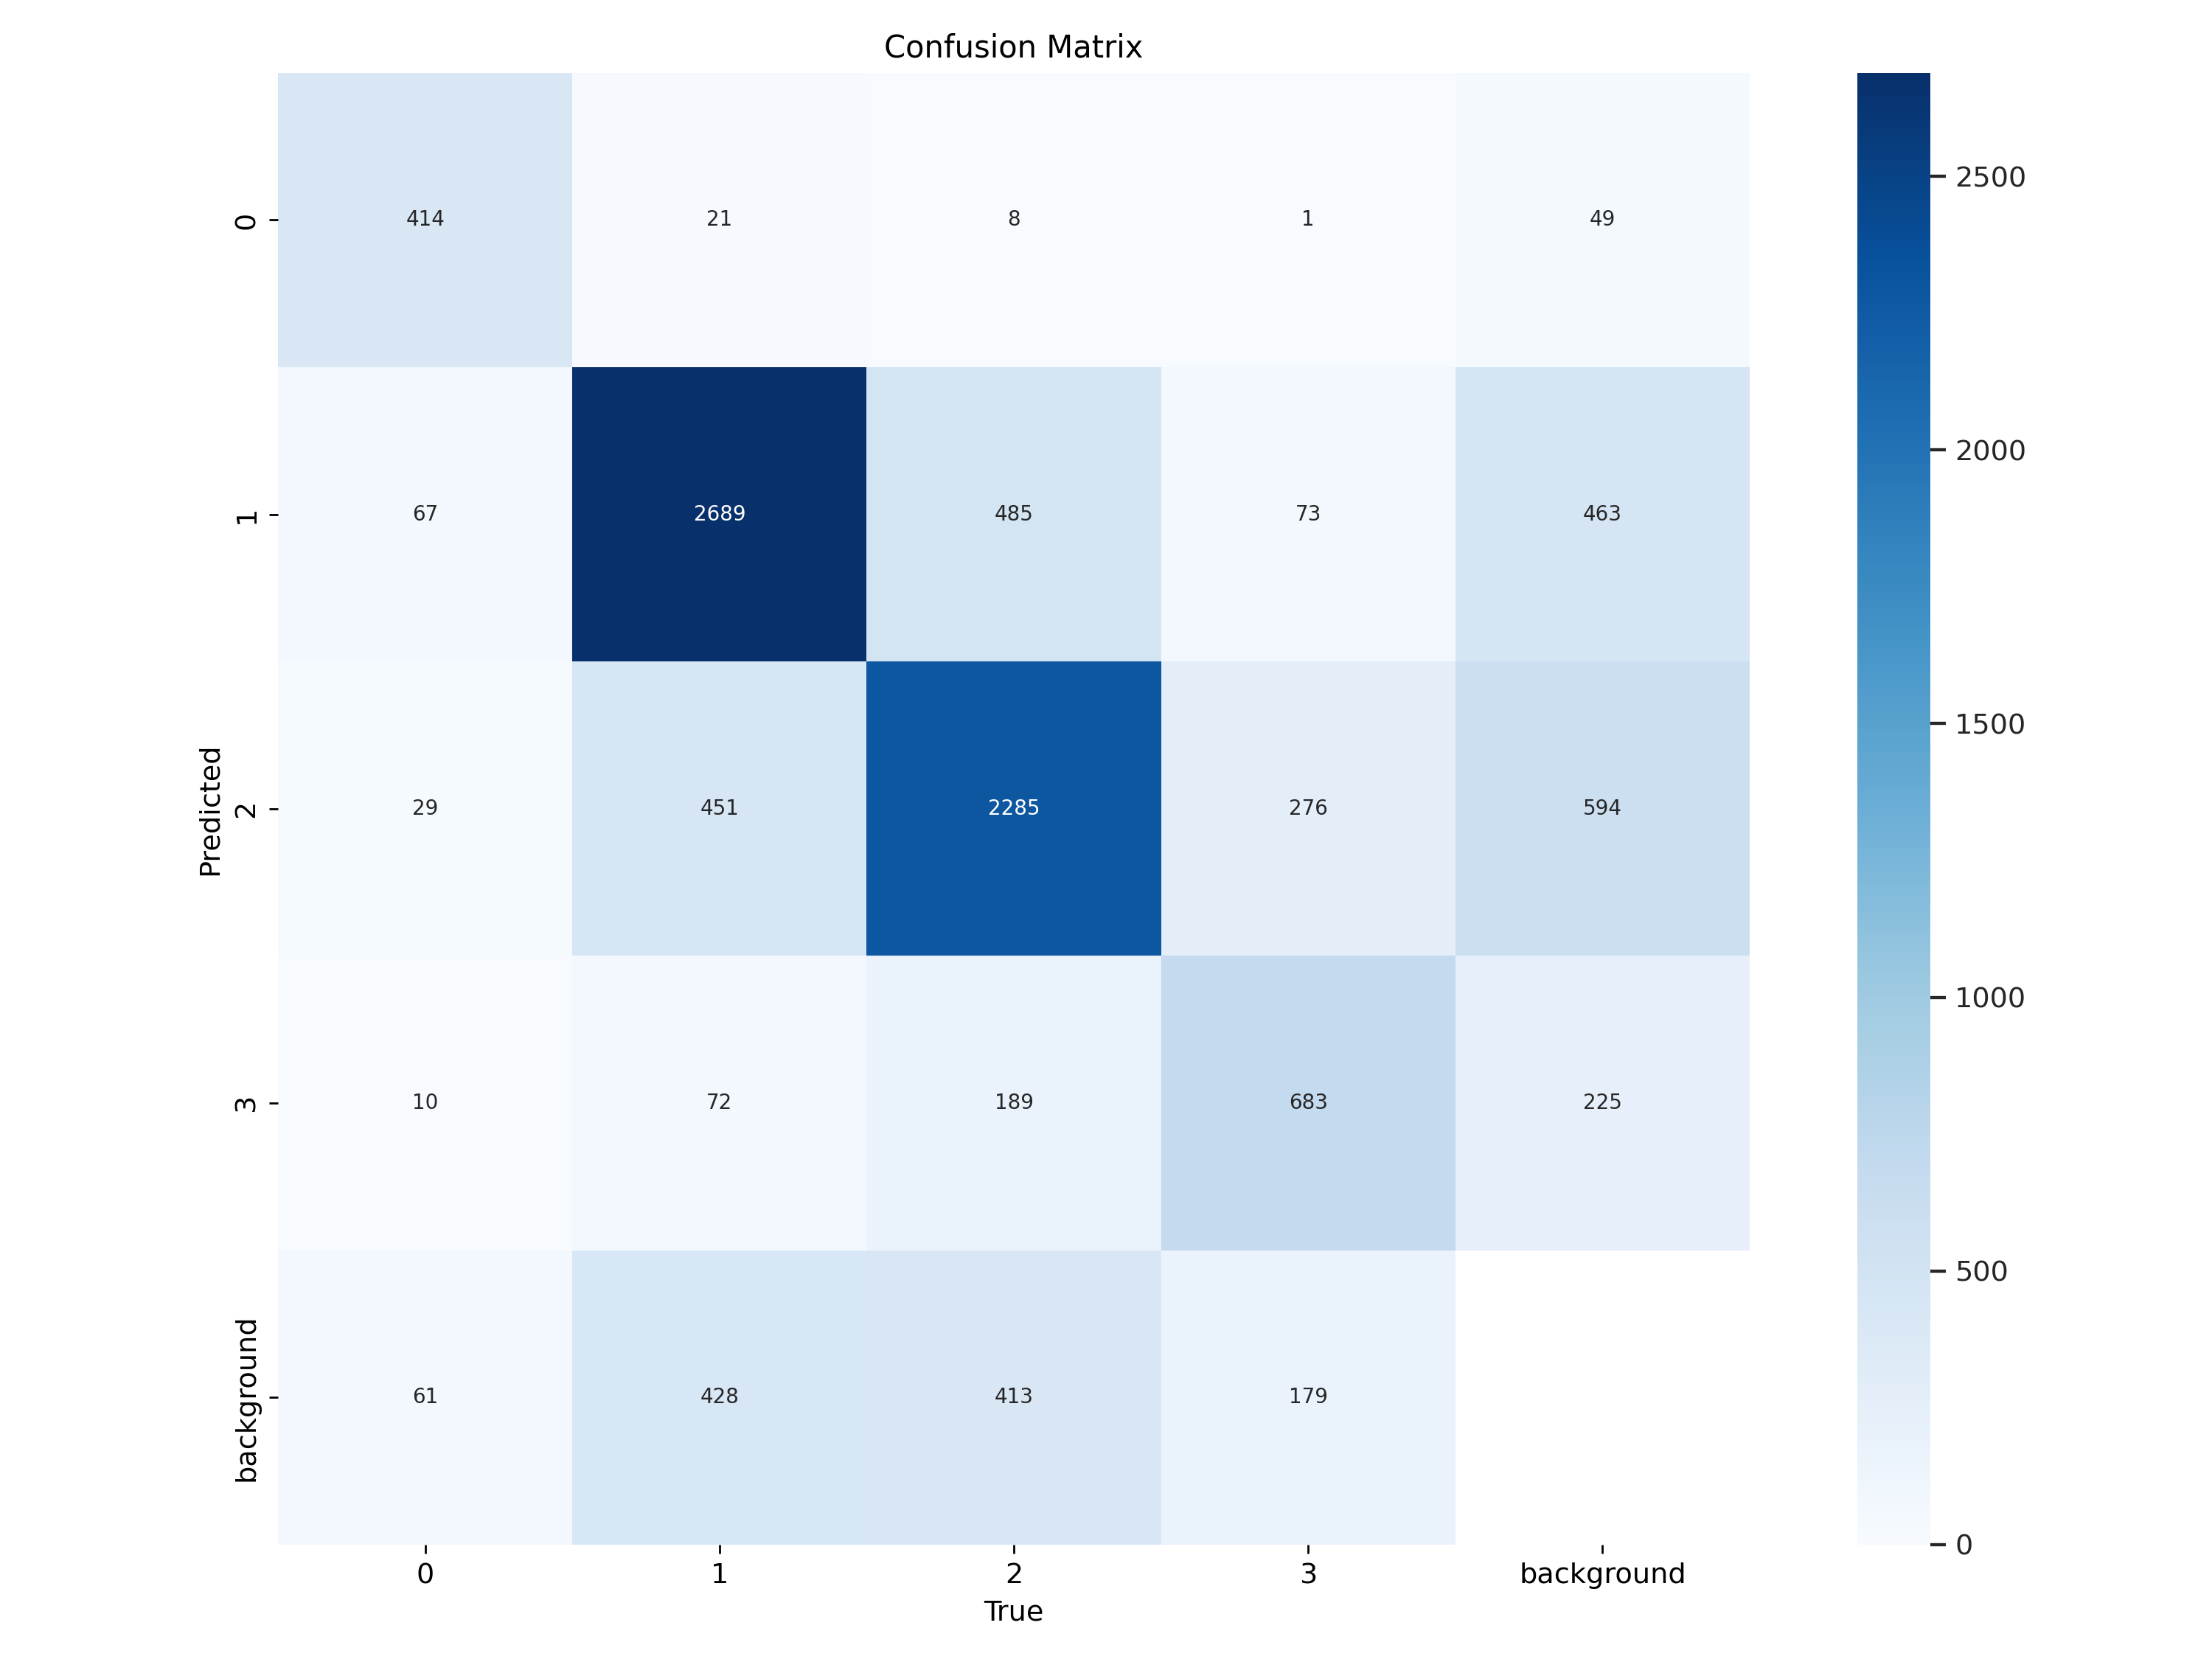

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


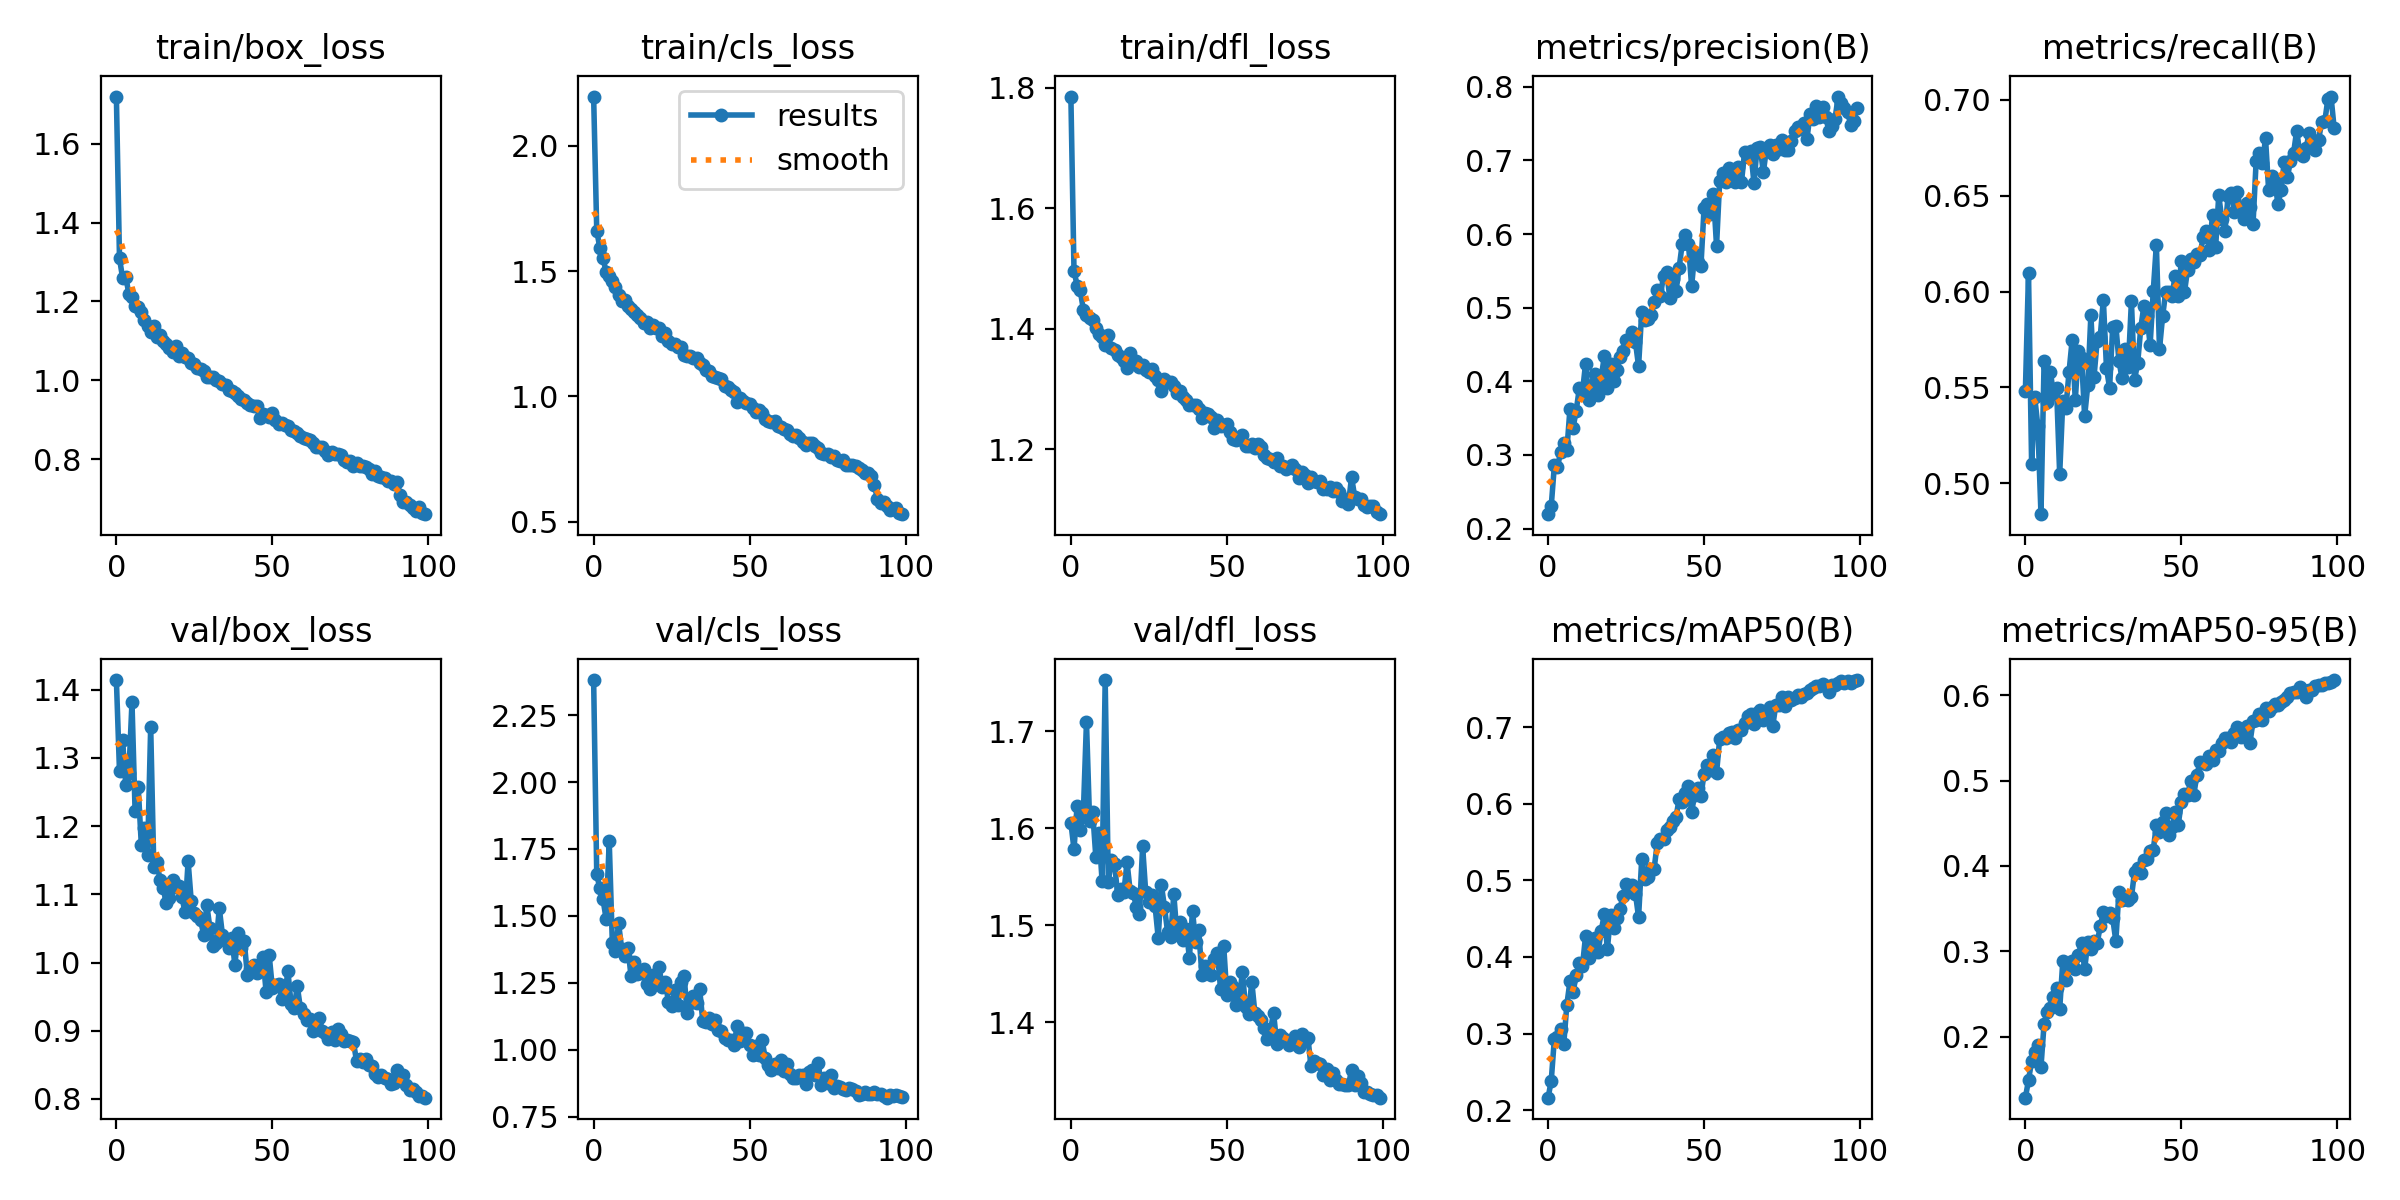

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


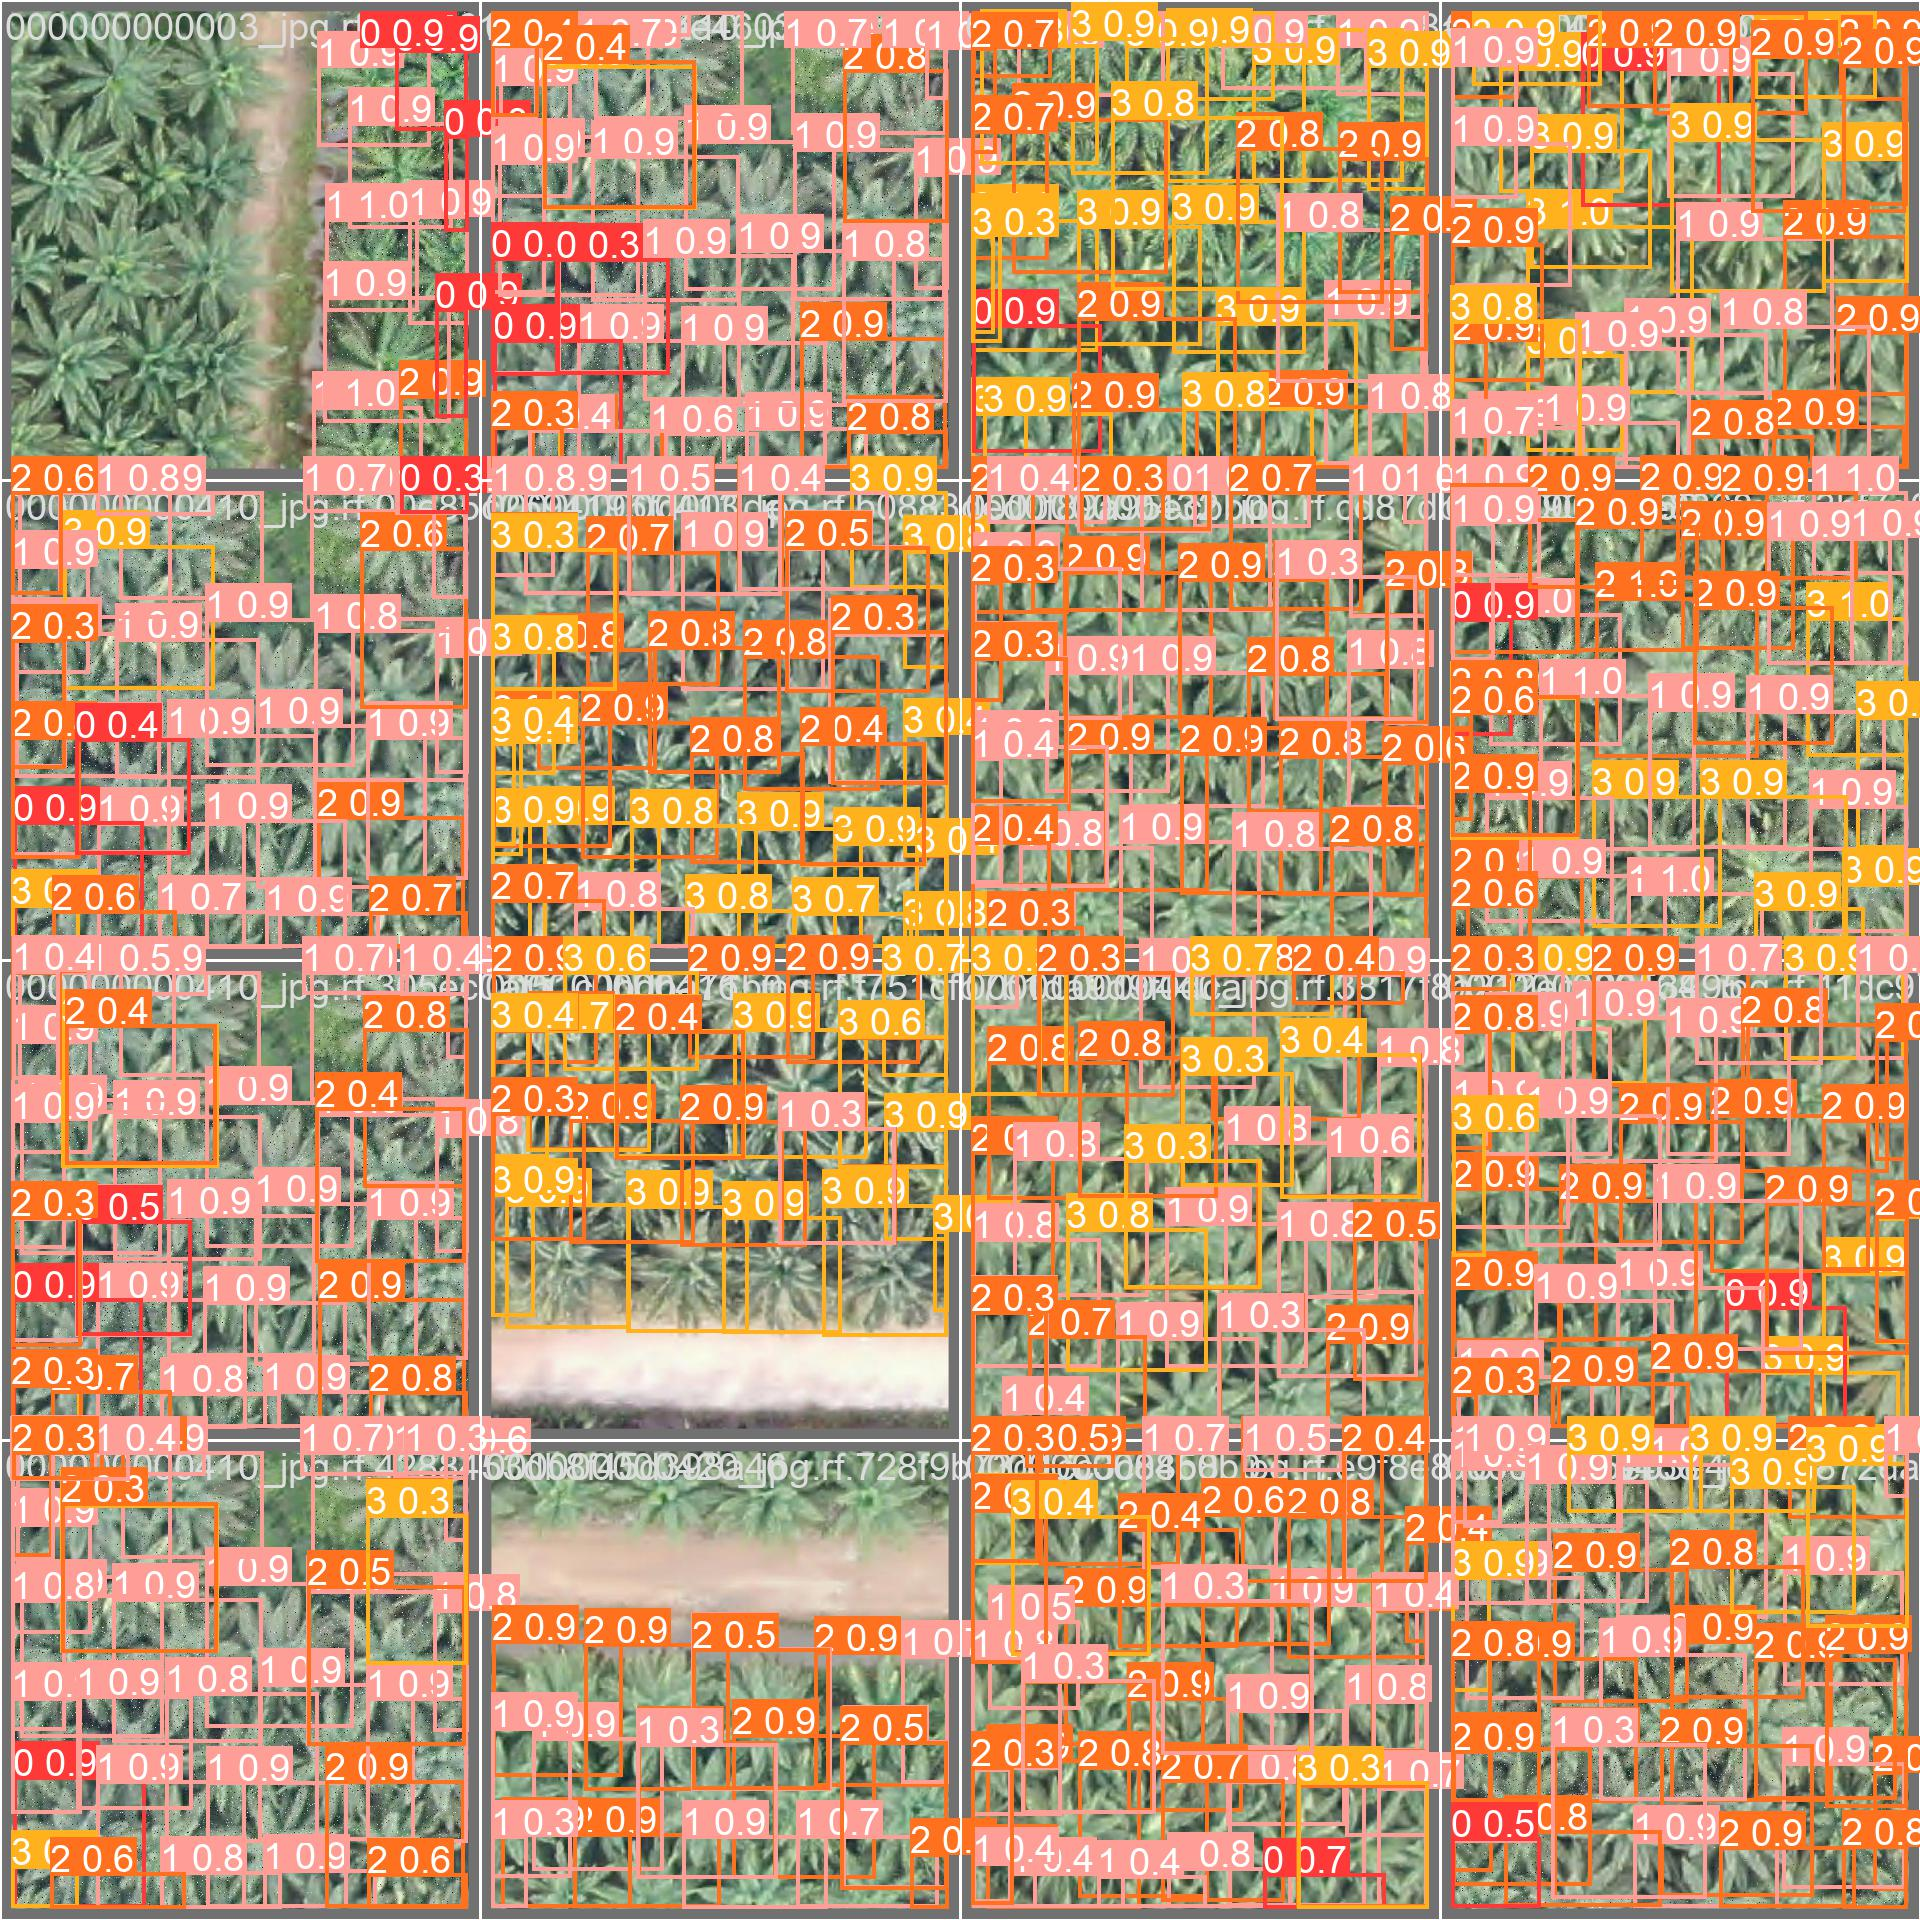

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [19]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.147 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients
val: Scanning /content/augmentasi-1/valid/labels.cache... 267 images, 0 backgrounds, 0 corrupt: 100% 267/267 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:27<00:00,  1.62s/it]
                   all        267       8834      0.771      0.686      0.761      0.618
                     0        267        581      0.904      0.718      0.805      0.682
                     1        267       3661      0.777      0.741      0.816      0.664
                     2        267       3380      0.717      0.699      0.765       0.61
                     3        267       1212      0.685      0.584       0.66      0.516
Speed: 1.6ms preprocess, 11.1ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/val


In [21]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.147 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients

image 1/135 /content/augmentasi-1/test/images/000000000002_jpg.rf.b3325b2cb2182f1d15e509f5f43357ac.jpg: 640x640 9 0s, 13 1s, 4 2s, 1 3, 16.3ms
image 2/135 /content/augmentasi-1/test/images/000000000002_jpg.rf.ea35b1ac176481b09f9ce72c3058edbf.jpg: 640x640 9 0s, 14 1s, 3 2s, 1 3, 16.3ms
image 3/135 /content/augmentasi-1/test/images/000000000006_jpg.rf.bc821b5d04ed7407038f9038329eba3d.jpg: 640x640 3 0s, 7 1s, 2 2s, 16.3ms
image 4/135 /content/augmentasi-1/test/images/000000000014_jpg.rf.9ade8f1f6cc0084e5b289506c112b6e5.jpg: 640x640 1 0, 18 1s, 14 2s, 2 3s, 16.3ms
image 5/135 /content/augmentasi-1/test/images/000000000015_jpg.rf.8323dde11a17d6a30612688e921b47d2.jpg: 640x640 1 0, 17 1s, 8 2s, 2 3s, 16.3ms
image 6/135 /content/augmentasi-1/test/images/000000000019_jpg.rf.b3f3e0e4670f933d0e40603aa1f06eaf.jpg: 640x640 20 1s, 15 2s

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={HOME}/img save=True

/content


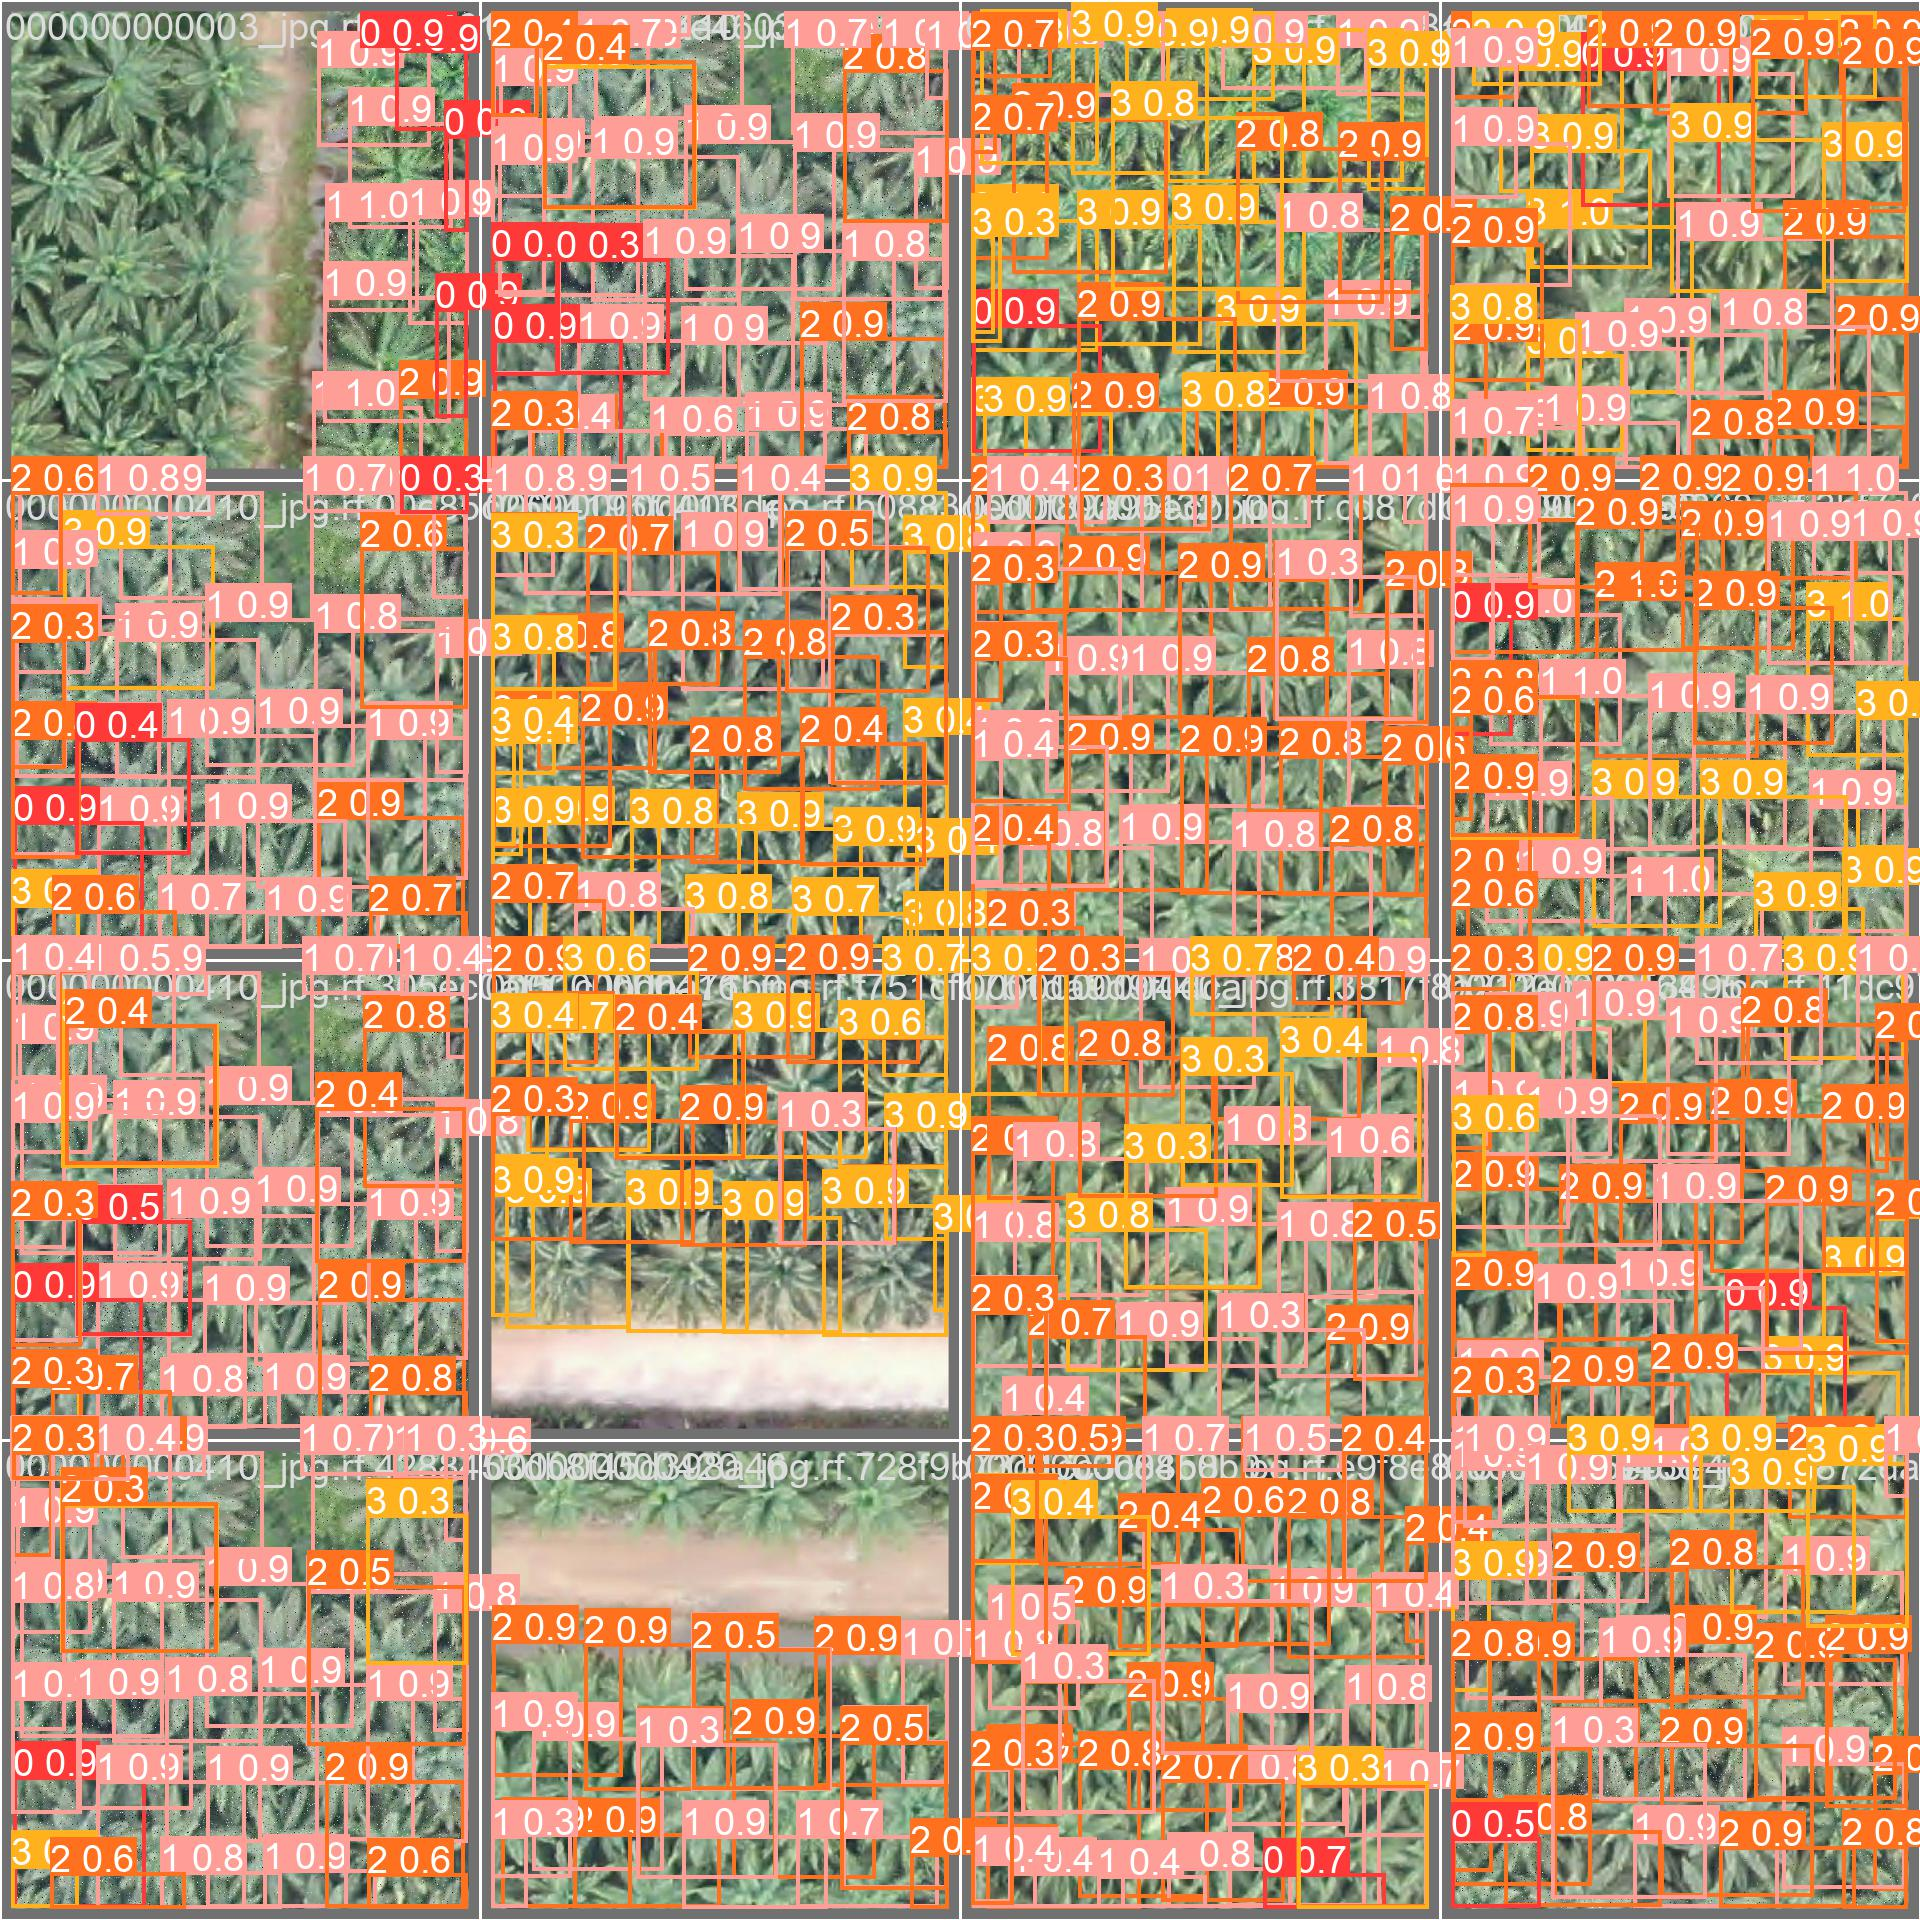

In [23]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:4]:
      display(Image(filename=image_path, width=600))
      print("\n")